In [2]:
%load_ext autoreload
%autoreload 2

In [47]:
import os
from pathlib import Path

from sentence_transformers import SentenceTransformer

from lang_main import (
    save_pickle,
    load_pickle,
    SAVE_PATH_FOLDER,
)

In [48]:
model_stfr = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

A:\Arbeitsaufgaben\lang-main\.venv\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [49]:
p = Path(os.getcwd()) / SAVE_PATH_FOLDER
p

WindowsPath('A:/Arbeitsaufgaben/lang-main/test-notebooks/results/test_new2')

In [50]:
folder = list(p.glob(r'*'))
folder

[WindowsPath('A:/Arbeitsaufgaben/lang-main/test-notebooks/results/test_new2/Pipe-TargetFeature_Step-3_remove_NA.pickle'),
 WindowsPath('A:/Arbeitsaufgaben/lang-main/test-notebooks/results/test_new2/map_candidates.pkl'),
 WindowsPath('A:/Arbeitsaufgaben/lang-main/test-notebooks/results/test_new2/map_texts.pkl'),
 WindowsPath('A:/Arbeitsaufgaben/lang-main/test-notebooks/results/test_new2/data.pkl')]

---

# Gather timeline candidates

In [51]:
from lang_main.analysis.timeline import (
    remove_non_relevant_obj_ids,
    filter_activities_per_obj_id,
    generate_model_input,
    get_timeline_candidates_index,
    transform_timeline_candidates,
    map_obj_texts,
)

In [52]:
ret = load_pickle(folder[0])
data = ret[0]
print(f"{len(data)=}")
data = remove_non_relevant_obj_ids(data, thresh_unique_feat_per_id=3)
data.info()

shared:INFO | 2024-05-22 13:45:11 +0000 | Loaded file successfully.
len(data)=123457
timeline:INFO | 2024-05-22 13:45:11 +0000 | Removing non-relevant ObjectIDs from dataset
timeline:DEBUG | 2024-05-22 13:45:12 +0000 | Ignored ObjectIDs: (0,)
timeline:INFO | 2024-05-22 13:45:12 +0000 | Non-relevant ObjectIDs removed successfully
<class 'pandas.core.frame.DataFrame'>
Index: 122958 entries, 0 to 123456
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   VorgangsID               122958 non-null  int64         
 1   ObjektID                 122958 non-null  int64         
 2   HObjektText              122953 non-null  object        
 3   ObjektArtID              122958 non-null  int64         
 4   ObjektArtText            122880 non-null  object        
 5   VorgangsTypID            122958 non-null  int64         
 6   VorgangsTypName          122958 non-null  object        
 7   

In [53]:
data['VorgangsTypName'].unique()

array(['Reparaturauftrag (Portal)', 'Wartung', 'Störungsmeldung'],
      dtype=object)

In [54]:
activity_types = [
    'Reparaturauftrag (Portal)',
    'Störungsmeldung',
]

(data, num_activities_per_obj_id) =\
filter_activities_per_obj_id(data, relevant_activity_types=activity_types)
num_activities_per_obj_id

timeline:INFO | 2024-05-22 13:45:12 +0000 | Filtering activities per ObjectID
timeline:INFO | 2024-05-22 13:45:12 +0000 | Activities per ObjectID filtered successfully


ObjektID
1       283
1654    243
7       223
151     189
140     140
       ... 
1698      2
683       2
1135      2
2170      2
297       2
Name: count, Length: 366, dtype: int64

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6104 entries, 0 to 123456
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   VorgangsID               6104 non-null   int64         
 1   ObjektID                 6104 non-null   int64         
 2   HObjektText              6103 non-null   object        
 3   ObjektArtID              6104 non-null   int64         
 4   ObjektArtText            6087 non-null   object        
 5   VorgangsTypID            6104 non-null   int64         
 6   VorgangsTypName          6104 non-null   object        
 7   VorgangsDatum            6104 non-null   datetime64[ns]
 8   VorgangsStatusId         6104 non-null   int64         
 9   VorgangsPrioritaet       6104 non-null   int64         
 10  VorgangsBeschreibung     6104 non-null   object        
 11  VorgangsOrt              0 non-null      object        
 12  VorgangsArtText          6104 non-nul

In [56]:
# VorgangsTypName, VorgangsArtText, VorgangsBeschreibung
prop_interest = ['VorgangsTypName', 'VorgangsArtText', 'VorgangsBeschreibung']
prop_interest = ['VorgangsArtText', 'VorgangsBeschreibung']
prop_interest = ['VorgangsBeschreibung']

target_feature_name = 'nlp_model_input'

In [57]:
anlys_data = generate_model_input(data, target_feature_name, model_input_features=prop_interest)

timeline:INFO | 2024-05-22 13:45:13 +0000 | Generating concatenation of model input features
timeline:INFO | 2024-05-22 13:45:13 +0000 | Model input generated successfully


In [58]:
anlys_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6104 entries, 0 to 123456
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   VorgangsID               6104 non-null   int64         
 1   ObjektID                 6104 non-null   int64         
 2   HObjektText              6103 non-null   object        
 3   ObjektArtID              6104 non-null   int64         
 4   ObjektArtText            6087 non-null   object        
 5   VorgangsTypID            6104 non-null   int64         
 6   VorgangsTypName          6104 non-null   object        
 7   VorgangsDatum            6104 non-null   datetime64[ns]
 8   VorgangsStatusId         6104 non-null   int64         
 9   VorgangsPrioritaet       6104 non-null   int64         
 10  VorgangsBeschreibung     6104 non-null   object        
 11  VorgangsOrt              0 non-null      object        
 12  VorgangsArtText          6104 non-nul

In [59]:
anlys_data.loc[anlys_data['HObjektText'].isna()]

VorgangsID  ObjektID HObjektText  ObjektArtID  \
52136      262888       315         NaN           32   

                                     ObjektArtText  VorgangsTypID  \
52136  Flurförderzeuge / Putzmaschine / Rasenmäher              3   

                 VorgangsTypName VorgangsDatum  VorgangsStatusId  \
52136  Reparaturauftrag (Portal)    2022-07-11                 5   

       VorgangsPrioritaet  ... VorgangsOrt VorgangsArtText ErledigungsDatum  \
52136                   0  ...         NaN  Flurförderzeug       2022-07-12   

         ErledigungsArtText ErledigungsBeschreibung MPMelderArbeitsplatz  \
52136  Intern UTT - Wartung         Räder gereinigt              Versand   

      MPAbteilungBezeichnung Arbeitsbeginn ErstellungsDatum  \
52136                Versand    2022-07-12       2022-07-11   

                   nlp_model_input  
52136  Laufrollen verstopft (Garn)  

[1 rows x 21 columns]

In [60]:
test = num_activities_per_obj_id.iloc[300:302].copy()
test = num_activities_per_obj_id.iloc[:2].copy()
test

ObjektID
1       283
1654    243
Name: count, dtype: int64

In [61]:
test = num_activities_per_obj_id.copy()
len(test)

366

In [62]:
tl_candidates = get_timeline_candidates_index(
    data=anlys_data,
    num_activities_per_obj_id=test,
    model=model_stfr,
    cos_sim_threshold=0.8,
    model_input_feature=target_feature_name,
)

for (obj_id, cands) in tl_candidates:
    print(f'{obj_id=}, {cands=}', flush=True)

In [63]:
candidates_by_obj_id = transform_timeline_candidates(tl_candidates)

  0%|          | 0/366 [00:00<?, ?it/s]

In [64]:
candidates_by_obj_id.keys()

dict_keys([1, 1654, 7, 151, 140, 20, 21, 1652, 1656, 138, 137, 141, 1808, 22, 1139, 144, 306, 345, 346, 1662, 347, 1663, 405, 337, 336, 69, 1657, 65, 515, 73, 84, 250, 1809, 79, 325, 90, 63, 96, 326, 72, 193, 315, 59, 136, 67, 195, 91, 74, 51, 77, 60, 2166, 186, 76, 100, 121, 78, 2165, 70, 407, 66, 109, 132, 94, 2480, 115, 80, 114, 111, 92, 110, 317, 68, 180, 54, 1126, 318, 108, 58, 107, 47, 98, 113, 81, 181, 119, 309, 127, 53, 75, 95, 218, 120, 149, 123, 183, 135, 116, 255, 152, 57, 388, 319, 44, 148, 316, 89, 625, 220, 64, 338, 145, 175, 698, 52, 129, 241, 182, 895, 122, 41, 259, 404, 214, 167, 153, 2562, 1348, 223, 894, 168, 112, 256, 312, 423, 157, 126, 213, 1659, 184, 432, 216, 281, 170, 1705, 232, 171, 279, 632, 626, 1124, 1152])

In [65]:
obj_id_to_text = map_obj_texts(
    anlys_data, 
    obj_ids=candidates_by_obj_id.keys(),
)

In [66]:
obj_id_to_text

{1: '00001, Ausrüstungsanlage 1',
 1654: 'WEBEREI ALLGEMEIN, Weberei allgemein',
 7: '00007, Ausrüstung 2',
 151: '00151, Bandschneidmaschine 4 / Kitamura',
 140: '00140, Schlichtmaschine 4 - Sucker',
 20: '00020, Lasercutter 2',
 21: '00021, Lasercutter 3',
 1652: '01652, Vorwerk allgemein',
 1656: 'GRUNDSTÜCK UND GEBÄUDE, Grundstück und Gebäude',
 138: '00138, Schärmaschine 9',
 137: '00137, Schärmaschine 7 - Matthys',
 141: '00141, Schlichtmaschine 5 - Sucker',
 1808: '01809, Labor allgemein',
 22: '00022, Lasercutter 4',
 1139: '01139, Ausrüstung 2 / Spannrahmen',
 144: '00144, Zettelmaschine 1',
 306: 'B04, Ketteinlegewagen',
 345: '00348, Warenschautisch 4',
 346: '00349, Warenschautisch 5',
 1662: 'AUSRÜSTUNG 2 ALLGEMEIN, Ausrüstung 2 allgemein',
 347: '00350, Warenschautisch 6',
 1663: '01663, Bandschneiderei allgemein',
 405: '00405, Assembliermaschine 8',
 337: '00337, Bändchenablängmaschine 1',
 336: 'B22, Ketteinlegewagen',
 69: '448 C , Webmaschine, DL 280 EMS Breite 280 B

In [67]:
p_data = (p / 'data').with_suffix('.pkl')
p_cands = (p / 'map_candidates').with_suffix('.pkl')
p_texts = (p / 'map_texts').with_suffix('.pkl')

In [68]:
save_pickle(anlys_data, p_data)
save_pickle(candidates_by_obj_id, p_cands)
save_pickle(obj_id_to_text, p_texts)

shared:INFO | 2024-05-22 13:53:32 +0000 | Saved file successfully under A:\Arbeitsaufgaben\lang-main\test-notebooks\results\test_new2\data.pkl
shared:INFO | 2024-05-22 13:53:32 +0000 | Saved file successfully under A:\Arbeitsaufgaben\lang-main\test-notebooks\results\test_new2\map_candidates.pkl
shared:INFO | 2024-05-22 13:53:32 +0000 | Saved file successfully under A:\Arbeitsaufgaben\lang-main\test-notebooks\results\test_new2\map_texts.pkl


In [30]:
anlys_data.columns

Index(['VorgangsID', 'ObjektID', 'HObjektText', 'ObjektArtID', 'ObjektArtText',
       'VorgangsTypID', 'VorgangsTypName', 'VorgangsDatum', 'VorgangsStatusId',
       'VorgangsPrioritaet', 'VorgangsBeschreibung', 'VorgangsOrt',
       'VorgangsArtText', 'ErledigungsDatum', 'ErledigungsArtText',
       'ErledigungsBeschreibung', 'MPMelderArbeitsplatz',
       'MPAbteilungBezeichnung', 'Arbeitsbeginn', 'ErstellungsDatum',
       'nlp_model_input'],
      dtype='object')

In [31]:
dashboard_feats = [
    'ErstellungsDatum',
    'ErledigungsDatum',
    'VorgangsTypName',
    'VorgangsBeschreibung',
]

In [36]:
test = anlys_data.iloc[:20].filter(dashboard_feats, axis=1).sort_values(by='ErstellungsDatum', ascending=True)

In [46]:
test['ErstellungsDatum'].dt.strftime('%Y-%m-%d')

0     2019-03-19
1     2019-03-21
2     2019-03-25
6     2019-04-01
8     2019-09-09
10    2019-09-20
12    2019-09-24
11    2019-09-25
13    2019-10-02
14    2019-10-04
19    2019-10-27
20    2019-11-06
21    2019-11-08
22    2019-11-13
24    2019-11-27
25    2019-12-16
26    2019-12-19
27    2019-12-19
36    2020-02-06
42    2020-03-10
Name: ErstellungsDatum, dtype: object

In [38]:
test.to_dict('records')

[{'ErstellungsDatum': Timestamp('2019-03-19 00:00:00'),
  'ErledigungsDatum': Timestamp('2019-03-20 00:00:00'),
  'VorgangsTypName': 'Reparaturauftrag (Portal)',
  'VorgangsBeschreibung': 'Kupplung schleift'},
 {'ErstellungsDatum': Timestamp('2019-03-21 00:00:00'),
  'ErledigungsDatum': Timestamp('2019-03-21 00:00:00'),
  'VorgangsTypName': 'Reparaturauftrag (Portal)',
  'VorgangsBeschreibung': 'Gegengewicht wieder anbringen'},
 {'ErstellungsDatum': Timestamp('2019-03-25 00:00:00'),
  'ErledigungsDatum': Timestamp('2019-03-25 00:00:00'),
  'VorgangsTypName': 'Reparaturauftrag (Portal)',
  'VorgangsBeschreibung': 'da ist etwas gebrochen. (Herr Heininger)'},
 {'ErstellungsDatum': Timestamp('2019-04-01 00:00:00'),
  'ErledigungsDatum': Timestamp('2019-04-08 00:00:00'),
  'VorgangsTypName': 'Reparaturauftrag (Portal)',
  'VorgangsBeschreibung': 'KBK tauschen\nUrsache vermutlich mechanisch'},
 {'ErstellungsDatum': Timestamp('2019-09-09 00:00:00'),
  'ErledigungsDatum': Timestamp('2019-09-09

In [228]:
obj_id = 1654
cands = [6696, 113620, 50223]

In [229]:
res = anlys_data.loc[cands].sort_index()
res

VorgangsID  ObjektID                             HObjektText  \
6696        144239      1654  WEBEREI ALLGEMEIN, Weberei allgemein,    
50223       508708      1654  WEBEREI ALLGEMEIN, Weberei allgemein,    
113620      141606      1654  WEBEREI ALLGEMEIN, Weberei allgemein,    

        ObjektArtID  ObjektArtText  VorgangsTypID            VorgangsTypName  \
6696             90  UTT allgemein              3  Reparaturauftrag (Portal)   
50223            90  UTT allgemein              3  Reparaturauftrag (Portal)   
113620           90  UTT allgemein              3  Reparaturauftrag (Portal)   

       VorgangsDatum  VorgangsStatusId  VorgangsPrioritaet  ... VorgangsOrt  \
6696      2021-11-07                 5                   0  ...         NaN   
50223     2023-01-23                 5                   0  ...         NaN   
113620    2021-10-06                 5                   0  ...         NaN   

                  VorgangsArtText ErledigungsDatum       ErledigungsArtText  \
6696    Verkabelung / Verdrahtung       2021-11-08  Intern UTT - Reparatur    
50223   Verkabelung / Verdrahtung       2023-01-23  Intern UTT - Reparatur    
113620  Verkabelung / Verdrahtung       2021-10-06  Intern UTT - Reparatur    

                                  ErledigungsBeschreibung  \
6696    Knotex Netzkabel wurde getauscht. Maschine läu...   
50223              Kabel an Stecker ab, gekürzt alles OK.   
113620  Kabel repariert (beide Seiten Wackelkontakt). ...   

       MPMelderArbeitsplatz MPAbteilungBezeichnung Arbeitsbeginn  \
6696                Weberei                Weberei    2021-11-08   
50223               Weberei                Weberei    2023-01-23   
113620              Weberei                Weberei    2021-10-06   

       ErstellungsDatum                                    nlp_model_input  
6696         2021-11-07  Knotex Netzkabel hat einen Wackelkontakt. Kabe...  
50223        2023-01-23  Knotex Netzkabel hat Wackelkontakt.\nHerr Bric...  
113620       2021-10-06  Knotex Netzkabel hat Wackelkontakt. Kabel lieg...  

[3 rows x 21 columns]

In [153]:
import plotly.express as px
import plotly.io as pio

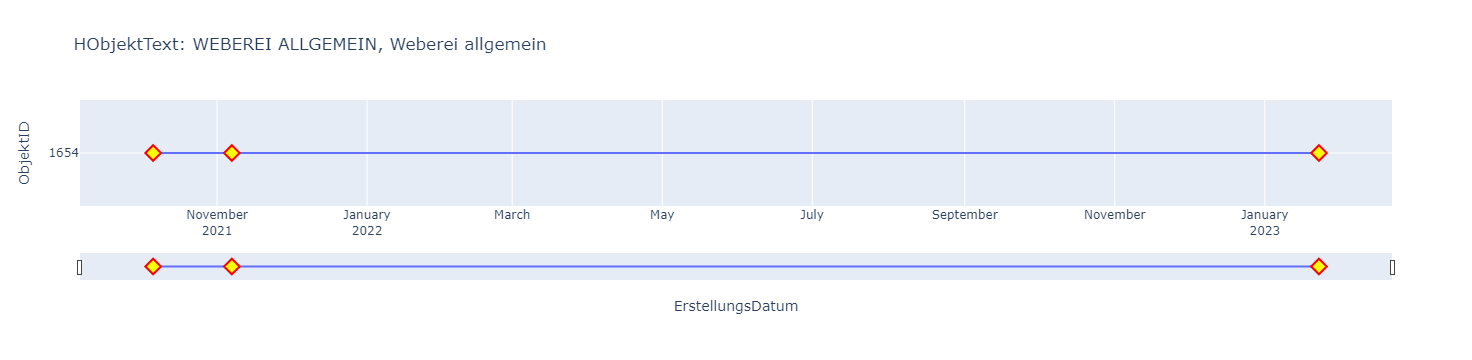

In [267]:
title = 'HObjektText: TEST'

markers = {
    'size': 12,
    'color': 'yellow',
    'line': {
        'width': 2,
        'color': 'red',
    },
}
hover_data = {
    'ErstellungsDatum': '|%d.%m.%Y',
    'VorgangsBeschreibung': True,
}
fig = px.line(
    data_frame=res,
    x='ErstellungsDatum',
    y='ObjektID',
    title=title,
    hover_data=hover_data,
)
fig.update_traces(mode='markers+lines', marker=markers, marker_symbol='diamond')
fig.update_xaxes(
    tickformat="%B\n%Y",
    rangeslider_visible=True,
)
fig.update_yaxes(type='category')
fig.update_layout(hovermode="x unified")